# Pingis och Statistik: Vem Vinner, Varför och Var? 


# Inledning 

Bordtennis är en av världens mest tekniskt krävande sporter, där utfallet av en match avgörs av en komplex kombination av precision, strategi och snabb reaktionsförmåga. Men vad är det egentligen som skiljer vinnarna från förlorarna? Är det enbart spelarnas tekniska skicklighet, eller finns det andra faktorer som spelar en avgörande roll? Hemmaplansfördel, publikens stöd och små skillnader i utrustning och miljö är några av de aspekter som ofta diskuteras, men hur stor inverkan har de egentligen?

Ett av de mest omvälvande skiftena inom sporten inträffade 2016, då plastbollen ersatte den tidigare celluloidbollen. Förändringen medförde att spelets karaktär ändrades dramatiskt: skruvens effekt minskade, bollen studsade annorlunda och speltempot blev snabbare. Detta väcker en rad frågor: Hur påverkade bollbytet lagens prestationer? Finns det mätbara förändringar i resultat före och efter skiftet? Och vilka faktorer bidrog till att vissa lag lyckades bättre med anpassningen än andra?

Samtidigt kvarstår frågan om hemmaplansfördelens verkliga betydelse. Är det en reell fördel, och i så fall varför? Beror det på spelarnas vana vid sin hemmamiljö, publikens stöd eller kanske till och med på lagens sponsorer och den utrustning de använder?

För att besvara dessa frågor fokuserar den här analysen på tre centrala frågeställningar:

1. Finns det en statistiskt signifikant skillnad i lagens prestationer på hemmaplan jämfört med bortaplan?

2. Hur påverkade bollbytet 2016 lagens resultat och hemmaplansfördel?

3. Hur påverkar publikens närvaro lagens prestationer på hemmaplan?


Genom att analysera data från "Pingisligan" för både herrar och damer, och kombinera statistiska metoder med visualiseringar, söker vi svar på dessa frågor. Resultaten syftar till att ge en djupare förståelse för vilka faktorer som påverkar framgång i bordtennis och vad som verkligen avgör matchernas utfall.


# Data

Datamaterialet är hämtat från Svenska Bordtennisförbundet och innehåller resultaten från "Pingisligan" för herrar, Sveriges högsta division inom sporten. Datasetet täcker perioden från säsongen 2010/2011 till 2023/2024. Varje observation representerar en lagmatch och innehåller information om hemmavinst, bortavinst, oavgjort hemma och oavgjort borta. Hemmavinst och bortavinst definieras som lagets totala matchresultat vid en given matchdag, medan oavgjort används för att beskriva matcher där resultatet blev lika.

För damernas "Pingisligan" täcker datan perioden 2017/2018 till 2023/2024.  På grund av begränsad tillgång till data från tidigare säsonger kunde inte damernas resultat från innan 2017 inkluderas.

Efter insamlingen bearbetades datan manuellt i ett kalkylark för att säkerställa att alla observationer var korrekta och konsekventa. Därefter importerades datan till Python för analys och visualisering.

För att utöka analysen och möjliggöra jämförelser mellan lag har en variabel för lagens huvudsponsor lagts till. Denna information har sammanställts manuellt från öppna källor som klubbarnas hemsidor och sponsoravtal. Lag som saknade sponsorinformation exkluderades från analyser relaterade till denna variabel.

 # Metod

För att analysera datamaterialet och besvara de frågor som ställts har flera statistiska metoder och visualiseringsverktyg använts. Här redogörs för de steg och tester som utförts, samt motiveringen bakom valet av metoder.

**Datahantering och transformationer**
 
För att rättvist kunna jämföra prestationer mellan lag där oavgjorda matcher förekommer, implementerades en justerad beräkning av vinster. I denna metod räknades varje oavgjord match som en halv vinst, vilket reflekterar lagens delade framgång i dessa matcher. Den justerade vinstberäkningen för hemmamatcher definierades som:

$$\text{Justerad Hemmavinst}=Hemmavinster+0.5\cdot\text{Oavgjort Hemma}$$

Samma logik applicerades på bortavinster:

$$\text{Justerad Bortavinst}=Bortavinster+0.5\cdot\text{Oavgjort Borta}$$

Denna justering säkerställde att lag med många oavgjorda matcher inte missgynnades i analyserna, och möjliggjorde en mer rättvis bild av lagens samlade prestationer.

Beräkning av vinstprocent: För att undersöka lagens prestationer på hemma- och bortaplan beräknades vinstprocenten separat för varje spelplats. Detta gjordes genom att dividera de justerade vinsterna med det totala antalet matcher för respektive spelplats. Formeln för hemmavinstprocent var:

$$Hemmavinstprocent=\frac{\text{Justerad Hemmavinst}}{\text{Totala Hemmamatcher}}\cdot100$$

Där det totala antalet hemmamatcher beräknades som summan av hemmavinster, hemmavinster efter oavgjorda matcher och hemmaförluster. En motsvarande beräkning gjordes för bortavinster: 

$$Bortavinstprocent=\frac{\text{Justerad Bortavinst}}{\text{Totala Bortamatcher}}\cdot100$$

Vinstkvot: För att ytterligare analysera skillnaderna mellan lagens prestationer på hemma- och bortaplan beräknades en vinstkvot. Denna definierades som förhållandet mellan hemmavinstprocent och bortavinstprocent:

$$Vinstkvot=\frac{Hemmavinstprocent}{Bortavinstprocent}$$

En vinstkvot större än 1 indikerade en starkare prestation på hemmaplan jämfört med bortaplan, medan en kvot nära 1 antydde en jämn prestation oberoende av spelplats. För att säkerställa robusthet i analysen filtrerades kvoter där bortavinstprocenten var noll (vilket resulterade i oändliga kvoter) eller där kvoten blev noll bort. Detta genomfördes genom att ersätta oändliga värden med noll och ta bort dessa ur datasetet innan statistiska tester utfördes.En vinstkvot större än 1 indikerade en starkare prestation på hemmaplan jämfört med bortaplan, medan en kvot nära 1 antydde en jämn prestation oberoende av spelplats. För att säkerställa robusthet i analysen filtrerades kvoter där bortavinstprocenten var noll (vilket resulterade i oändliga kvoter) eller där kvoten blev noll bort. Detta genomfördes genom att ersätta oändliga värden med noll och ta bort dessa ur datasetet innan statistiska tester utfördes.

**Statistiska tester och visualiseringar**

Jag började med att plotta hemmavinstprocent mot bortavinstprocent för att undersöka hur lagens prestationer skiljde sig beroende på spelplats. Detta gav en första indikation på att hemmaplansfördel kunde ha en inverkan. För att testa detta vidare genomfördes ett t-test för att undersöka om skillnaden mellan hemmavinstprocent och bortavinstprocent var statistiskt signifikant.

Efter den inledande analysen gick jag vidare med att undersöka effekten av regeländringen som infördes säsongen 2016/2017, då plastbollar blev standard inom sporten. Jag delade upp datan i två perioder: före och efter denna förändring, och plottade vinstkvoter för lagen under båda perioderna för att identifiera eventuella förändringar i prestation. Jag analyserade noggrant vilka lag som uppvisade de största förändringarna och undersökte gemensamma faktorer mellan dessa lag. Efter vidare efterforskningar beslutade jag att inkludera sponsor som en variabel i analysen, vilket gjorde det möjligt att plotta och jämföra vinstkvoter för lagen både före och efter 2016.

Nästa steg var att analysera publikens inverkan. Eftersom säsongen 2020/2021 var unik genom att publik inte var tillåten, skapade jag en binär variabel för publik (1 = med publik, 0 = utan publik). Jag jämförde lagens hemmavinstprocent mellan säsongen utan publik och säsongerna med publik genom visualiseringar och t-tester. Detta möjliggjorde en analys av om publikens närvaro hade en signifikant effekt på lagens prestationer.

Slutligen läste jag in data för damernas "pingisligan". Jag plottade vinstprocent för  seriern och genomförde tester för att undersöka om det fanns signifikanta skillnader mellan könen. Detta gav en bredare förståelse för eventuella könsspecifika mönster i prestationerna.



# Resultat

I denna sektion presenteras resultaten från analyserna av hemmavinstprocent, effekten av bollbytet 2016 och sponsorer. Resultaten förstärks med visualiseringar och tabeller för att ge en tydlig bild av de identifierade mönstren och sambanden.

**Skillnaden i vinstprocent hemma vs borta herrar**

För att undersöka om det finns en skillnad mellan vinstprocent hemma och borta analyserades justerade vinstprocent för samtliga lag. En visualisering av de genomsnittliga vinstprocenterna per spelplats presenteras nedan.



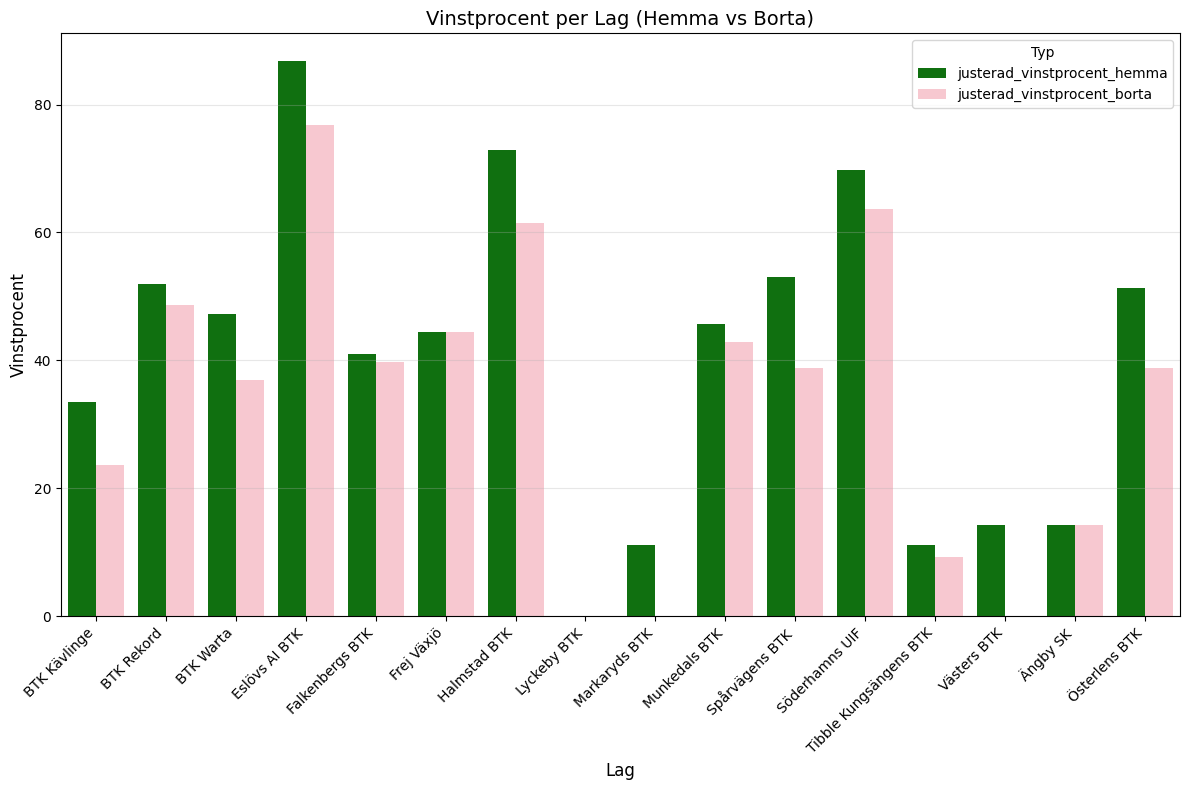

T-statistik för vinstprocent hemma vs borta: 2.365029174099869
P-värde för vinstprocent hemma vs borta: 0.01882026335003066


In [5]:
# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Beräkna "justerad" hemmavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']

# Beräkna "justerad" bortavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher spelade hemma (vinst, oavgjort och förlust)
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']

# Beräkna totalt antal matcher spelade borta (vinst, oavgjort och förlust)
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent hemma genom att dividera justerade hemmavinster med totala hemmamatcher och multiplicera med 100
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100

# Beräkna justerad vinstprocent borta genom att dividera justerade bortavinster med totala bortamatcher och multiplicera med 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

# Beräkna genomsnittlig vinstprocent hemma och borta per lag
vinstprocent_per_lag = df.groupby('Lag')[['justerad_vinstprocent_hemma', 'justerad_vinstprocent_borta']].mean()

# Konvertera till långformat för seaborn
vinstprocent_per_lag = vinstprocent_per_lag.reset_index().melt(id_vars='Lag', 
                                                              var_name='Typ', 
                                                              value_name='Vinstprocent')

# Plotta barplot med seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Lag',
    y='Vinstprocent',
    hue='Typ',
    data=vinstprocent_per_lag,
    palette=['green', 'pink']
)

# Anpassa plottens utseende
plt.title('Vinstprocent per Lag (Hemma vs Borta)', fontsize=14)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Vinstprocent', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Typ', loc='upper right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Filtrera data för vinstprocent hemma och borta
vinstprocent_hemma = df['justerad_vinstprocent_hemma']
vinstprocent_borta = df['justerad_vinstprocent_borta']

# Utför t-test för att jämföra vinstprocent hemma och borta
t_stat_hemma_borta, p_value_hemma_borta = ttest_ind(vinstprocent_hemma, vinstprocent_borta, equal_var=False)

# Visa resultaten
print(f"T-statistik för vinstprocent hemma vs borta: {t_stat_hemma_borta}")
print(f"P-värde för vinstprocent hemma vs borta: {p_value_hemma_borta}")


Stapeldiagrammet visar att lagens genomsnittliga vinstprocent är högre hemma än borta, vilket också bekräftades av ett signifikant resultat i t-testet ($p=0.01882026335003066$)."

**Effekten av bollbytet 2016**

För att undersöka hur bollbytet 2016 påverkade lagen delades data in i två perioder: före och efter regeländringen. Genomsnittliga vinstkvoter för lagen i båda perioderna plottades och jämfördes.



In [2]:
# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta']+ df['Bortaförlust']

df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100


# Extrahera startåret från säsong
df['Startår'] = df['Säsong'].str.split('/').str[0].astype(int)

# Skapa kolumn för period
df['Period'] = df['Startår'].apply(lambda x: 'Före 2016' if x < 2016 else 'Efter 2016')

# Gruppmedelvärde för vinstprocent hemma per lag och period
förbättring = df.groupby(['Lag', 'Period'])['justerad_vinstprocent_hemma'].mean().unstack()

# Beräkna förändring mellan perioderna
förbättring['Förändring'] = förbättring['Efter 2016'] - förbättring['Före 2016']

# Sortera efter förbättring
förbättring = förbättring.sort_values('Förändring', ascending=False).dropna()

# Visa resultaten
print("Lag med fullständig data för Före och Efter 2016:")
förbättring.head(16)



Lag med fullständig data för Före och Efter 2016:


Period,Efter 2016,Före 2016,Förändring
Lag,,,
Spårvägens BTK,65.306122,38.756614,26.549509
BTK Kävlinge,39.285714,24.444444,14.841270
Söderhamns UIF,72.321429,66.269841,6.051587
BTK Rekord,53.061224,50.000000,3.061224
Eslövs AI BTK,87.500000,85.846561,1.653439
BTK Warta,46.428571,47.486772,-1.058201
Halmstad BTK,66.964286,80.687831,-13.723545
Falkenbergs BTK,30.952381,51.190476,-20.238095
Österlens BTK,14.285714,57.539683,-43.253968


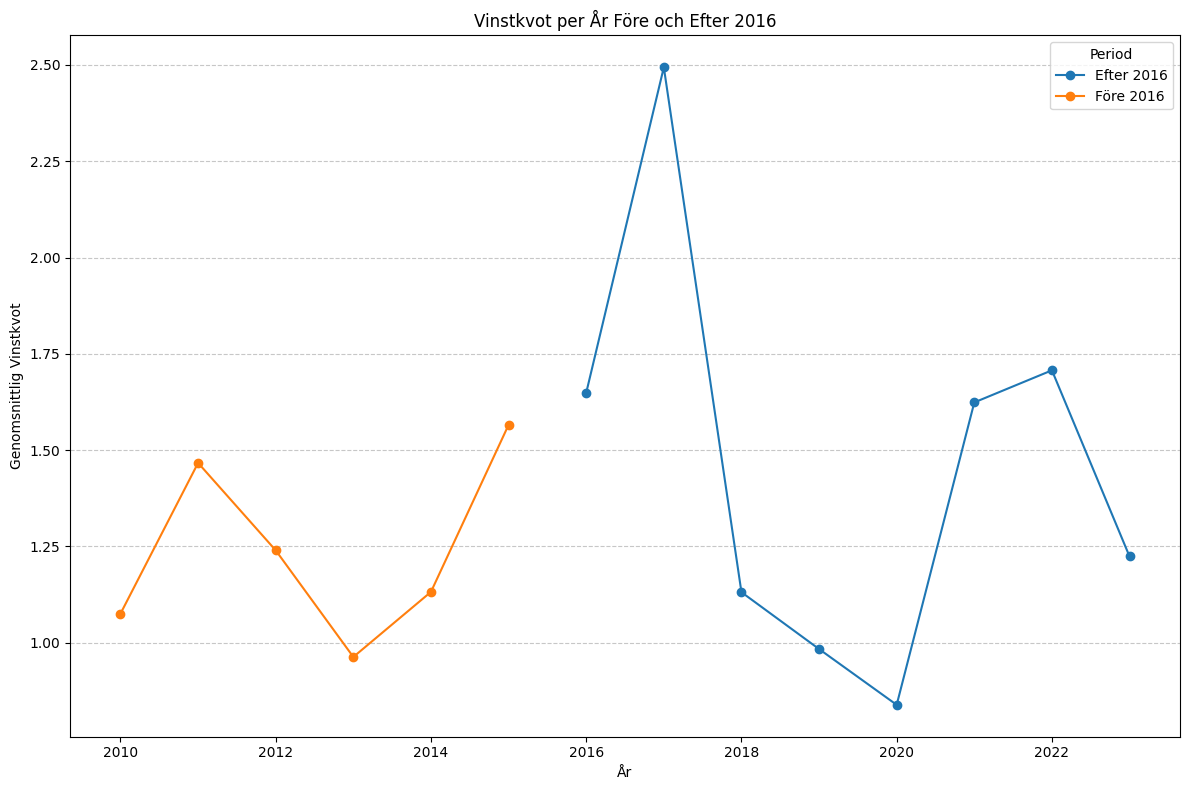

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Beräkna justerade vinster
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

# Extrahera startåret från säsong
df['Startår'] = df['Säsong'].str.split('/').str[0].astype(int)
df['Period'] = df['Startår'].apply(lambda x: 'Före 2016' if x < 2016 else 'Efter 2016')

# Ta bort rader där justerad_vinstprocent_hemma eller justerad_vinstprocent_borta är noll
df = df[(df['justerad_vinstprocent_hemma'] > 0) & (df['justerad_vinstprocent_borta'] > 0)]

# Beräkna vinstkvot (hemma/borta)
df['vinstkvot'] = df['justerad_vinstprocent_hemma'] / df['justerad_vinstprocent_borta']

# Gruppmedelvärde för vinstkvot per lag och period
vinstkvot_per_lag = df.groupby(['Startår', 'Period'])['vinstkvot'].mean().unstack()

# Skapa en linjeplot för att jämföra före och efter 2016
vinstkvot_per_lag.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Vinstkvot per År Före och Efter 2016')
plt.xlabel('År')
plt.ylabel('Genomsnittlig Vinstkvot')
plt.legend(title='Period')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Resultaten indikerar att vissa lag, som Spårvägens BTK, anpassade sig väl till regeländringen med införandet av plastbollen, medan andra lag, som Falkenbergs BTK, uppvisade en sämre prestation efter förändringen. Noterbart är också att lag som Frej Växjö och Tibble Kungsängens BTK inte deltog i ligan efter 2016, medan Ängby SK endast spelade efter detta år. När man granskar vinstkvoten för alla lag tillsammans framträder ingen större skillnad mellan perioderna före och efter 2016. Det första året efter bollbytet visade en markant ökning i vinstkvoterna, men därefter jämnade nivåerna ut sig.

**Jämförelse mellan olika sponsorer**

För att undersöka om sponsorskap hade en inverkan på lagens prestationer jämfördes vinstkvoter för lag med olika sponsorer. Analysen fokuserade på de sponsorer vars lag deltog både före och efter 2016. Genom att visualisera vinstkvoter för respektive sponsor före och efter regeländringen kunde mönster och potentiella skillnader identifieras. Genom att inkludera sponsorer som en variabel i analysen blev det möjligt att upptäcka samband mellan sponsorskap och framgång.


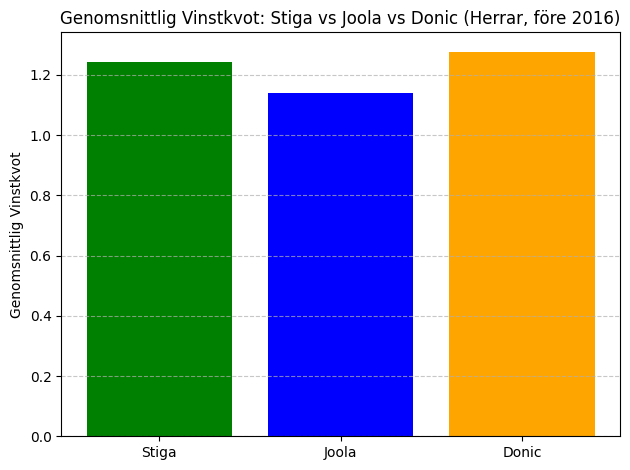

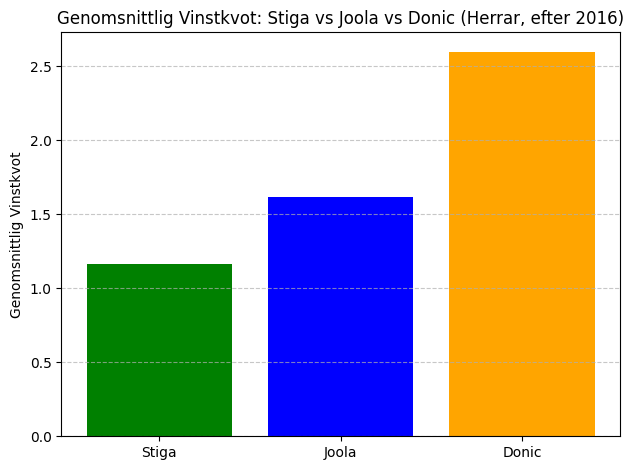

In [9]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Ange sökvägen till filen
file_path_herrar = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
herr_data = pd.read_csv(file_path_herrar)

# Beräkna justerade vinster
herr_data['justerad_hemmavinst'] = herr_data['Hemmavinst'] + 0.5 * herr_data['Oavgjort Hemma']
herr_data['justerad_bortavinst'] = herr_data['Bortavinst'] + 0.5 * herr_data['Oavgjort Borta']

# Beräkna totalt antal matcher
herr_data['total_matcher_hemma'] = herr_data['Hemmavinst'] + herr_data['Oavgjort Hemma'] + herr_data['Hemmaförlust']
herr_data['total_matcher_borta'] = herr_data['Bortavinst'] + herr_data['Oavgjort Borta'] + herr_data['Bortaförlust']

# Beräkna vinstkvot och hantera division med noll
herr_data['vinstkvot'] = herr_data.apply(
    lambda row: row['justerad_hemmavinst'] / row['justerad_bortavinst'] if row['justerad_bortavinst'] > 0 else 0,
    axis=1
)

# Extrahera startåret från säsong
herr_data['Startår'] = herr_data['Säsong'].str.split('/').str[0].astype(int)

# Lägg till sponsorinformation
sponsors = {
    'BTK Kävlinge': 'Joola',
    'Spårvägens BTK': 'Donic',
    'Eslövs AI BTK': 'Stiga',
    'Halmstad BTK': 'Stiga',
    'Söderhamns UIF': 'Stiga',
    'BTK Rekord': 'Stiga',
    'BTK Warta': 'Stiga',
     'Falkenbergs BTK': 'Stiga',
    'Frej Växjö': 'Yasaka',
    'Lyckeby BTK': 'Yasaka',
    'Munkedals BTK': 'Stiga',
    'Tibble Kungsängens BTK': 'Yasaka',
    'Västers BTK': 'Butterfly',
    'Ängby SK': 'Butterfly',
    'Österlens BTK': 'Butterfly'
}

herr_data['Sponsor'] = herr_data['Lag'].map(sponsors)

# Filtrera bort rader där sponsor är NaN
herr_data = herr_data.dropna(subset=['Sponsor'])

# Separera data före och efter 2016
before_2016 = herr_data[herr_data['Startår'] <= 2016]
after_2016 = herr_data[herr_data['Startår'] > 2016]

# Rensa `inf` och `NaN` från vinstkvot
before_2016 = before_2016.replace([float('inf'), -float('inf')], 0).dropna(subset=['vinstkvot'])
after_2016 = after_2016.replace([float('inf'), -float('inf')], 0).dropna(subset=['vinstkvot'])

# Separera sponsorer för analys före 2016
stiga_vinstkvot_before = before_2016[before_2016['Sponsor'] == 'Stiga']['vinstkvot']
joola_vinstkvot_before = before_2016[before_2016['Sponsor'] == 'Joola']['vinstkvot']
donic_vinstkvot_before = before_2016[before_2016['Sponsor'] == 'Donic']['vinstkvot']
# Plotta jämförelse före 2016
means_before = {
    'Stiga': stiga_vinstkvot_before.mean() if len(stiga_vinstkvot_before) > 0 else 0,
    'Joola': joola_vinstkvot_before.mean() if len(joola_vinstkvot_before) > 0 else 0,
    'Donic': donic_vinstkvot_before.mean() if len(donic_vinstkvot_before) > 0 else 0
}

plt.bar(means_before.keys(), means_before.values(), color=['green', 'blue', 'orange'])
plt.title('Genomsnittlig Vinstkvot: Stiga vs Joola vs Donic (Herrar, före 2016)')
plt.ylabel('Genomsnittlig Vinstkvot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Separera sponsorer för analys efter 2016
stiga_vinstkvot_after = after_2016[after_2016['Sponsor'] == 'Stiga']['vinstkvot']
joola_vinstkvot_after = after_2016[after_2016['Sponsor'] == 'Joola']['vinstkvot']
donic_vinstkvot_after = after_2016[after_2016['Sponsor'] == 'Donic']['vinstkvot']



# Plotta jämförelse efter 2016
means_after = {
    'Stiga': stiga_vinstkvot_after.mean() if len(stiga_vinstkvot_after) > 0 else 0,
    'Joola': joola_vinstkvot_after.mean() if len(joola_vinstkvot_after) > 0 else 0,
    'Donic': donic_vinstkvot_after.mean() if len(donic_vinstkvot_after) > 0 else 0
}

plt.bar(means_after.keys(), means_after.values(), color=['green', 'blue', 'orange'])
plt.title('Genomsnittlig Vinstkvot: Stiga vs Joola vs Donic (Herrar, efter 2016)')
plt.ylabel('Genomsnittlig Vinstkvot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Resultaten indikerar att lag sponsrade av Joola och Donic har uppvisat en förbättring i sina prestationer efter bollbytet 2016, medan lag med Stiga som sponsor har visat en relativt stabil prestation under samma period. Dessa mönster kan tyda på att olika sponsorer har påverkats olika av de förändrade spelvillkoren efter regeländringen.

**Effekten av publikens närvaro**

För att undersöka hur publiknärvaro påverkar lagens prestation jämfördes säsongen 2020/2021, då matcher spelades utan publik på grund av pandemin, med övriga säsonger där publik var tillåten. Denna jämförelse syftar till att identifiera om och hur publikens stöd påverkar lagens vinstkvoter. Ett t-test mellan säsongen 2020/2021 och resterande säsonger gjordes också. 

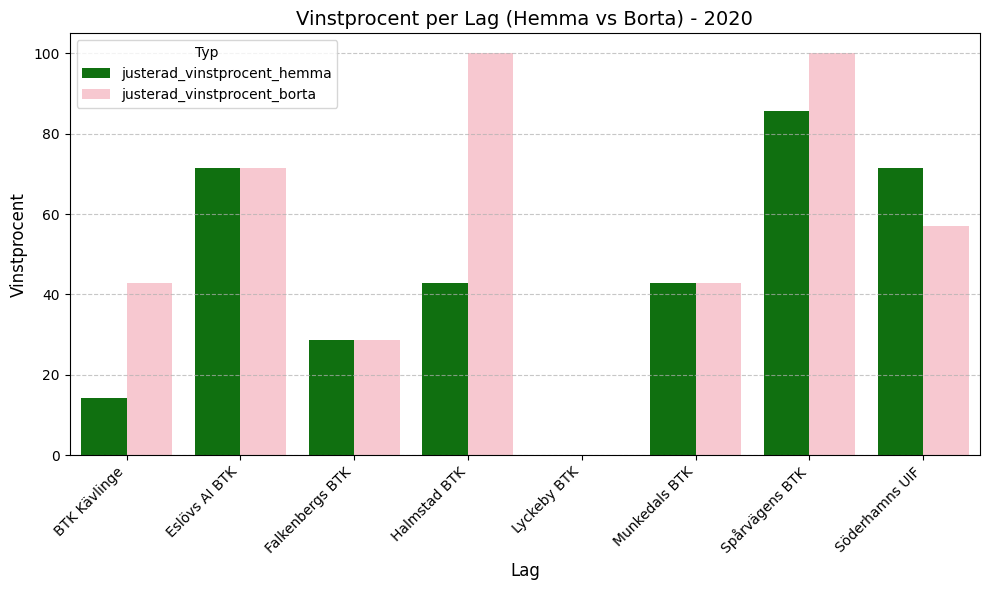

T-test för vinstkvot mellan 2020 och alla andra år:
T-statistik: -3.2736250753386464
P-värde: 0.004729728105765621


In [6]:
# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisliganherrar.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Beräkna "justerad" hemmavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']

# Beräkna "justerad" bortavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher spelade hemma (vinst, oavgjort och förlust)
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']

# Beräkna totalt antal matcher spelade borta (vinst, oavgjort och förlust)
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent hemma genom att dividera justerade hemmavinster med totala hemmamatcher och multiplicera med 100
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100

# Beräkna justerad vinstprocent borta genom att dividera justerade bortavinster med totala bortamatcher och multiplicera med 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

# Extrahera startåret från säsong
df['Startår'] = df['Säsong'].str.split('/').str[0].astype(int)

# Filtrera data för 2020
df_2020 = df[df['Startår'] == 2020].copy()

# Gruppvis medelvärde för vinstprocent per lag för 2020
df_2020_lag = df_2020.groupby('Lag')[['justerad_vinstprocent_hemma', 'justerad_vinstprocent_borta']].mean().reset_index()

# Plotta vinstprocent per lag för 2020 med Seaborn
plt.figure(figsize=(10, 6))
df_2020_lag_melted = df_2020_lag.melt(id_vars='Lag', var_name='Typ', value_name='Vinstprocent')
sns.barplot(
    x='Lag',
    y='Vinstprocent',
    hue='Typ',
    data=df_2020_lag_melted,
    palette=['green', 'pink']
)
plt.title('Vinstprocent per Lag (Hemma vs Borta) - 2020', fontsize=14)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Vinstprocent', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Filtrera data för övriga år
df_other_years = df[df['Startår'] != 2020].copy()

# Beräkna vinstkvot (hemma/borta) för 2020 och övriga år, hantera nollvärden
df_2020['vinstkvot'] = np.where(
    df_2020['justerad_vinstprocent_borta'] > 0,
    df_2020['justerad_vinstprocent_hemma'] / df_2020['justerad_vinstprocent_borta'],
    np.nan
)

df_other_years['vinstkvot'] = np.where(
    df_other_years['justerad_vinstprocent_borta'] > 0,
    df_other_years['justerad_vinstprocent_hemma'] / df_other_years['justerad_vinstprocent_borta'],
    np.nan
)

# Filtrera bort nollkvoter från båda dataset
df_2020 = df_2020.dropna(subset=['vinstkvot']).copy()
df_other_years = df_other_years.dropna(subset=['vinstkvot']).copy()

# Utför t-test mellan vinstkvoter för 2020 och övriga år
t_stat, p_value = ttest_ind(df_2020['vinstkvot'], df_other_years['vinstkvot'], equal_var=False)

# Visa resultaten
print("T-test för vinstkvot mellan 2020 och alla andra år:")
print(f"T-statistik: {t_stat}")
print(f"P-värde: {p_value}")



Resultaten indikerar att lagens genomsnittliga vinstkvoter var högre under säsonger med publik jämfört med säsongen utan publik. Detta antyder att publiknärvaro kan ge ett psykologiskt eller taktiskt stöd som gynnar hemmalagen. Resultatet är statistiskt signifikant. 


**Skillnaden i vinstprocent hemma vs borta, damer** 

För att undersöka eventuella mönster i damernas prestationer i Pingisligan analyserades data från säsongerna 2017/2018 till 2023/2024. Fokus låg på att jämföra vinstprocent mellan hemma- och bortaplan, samt att identifiera skillnader i lagens prestationer över tid. Data för hemmavinstprocent, bortavinstprocent och vinstkvoter sammanställdes och visualiserades.



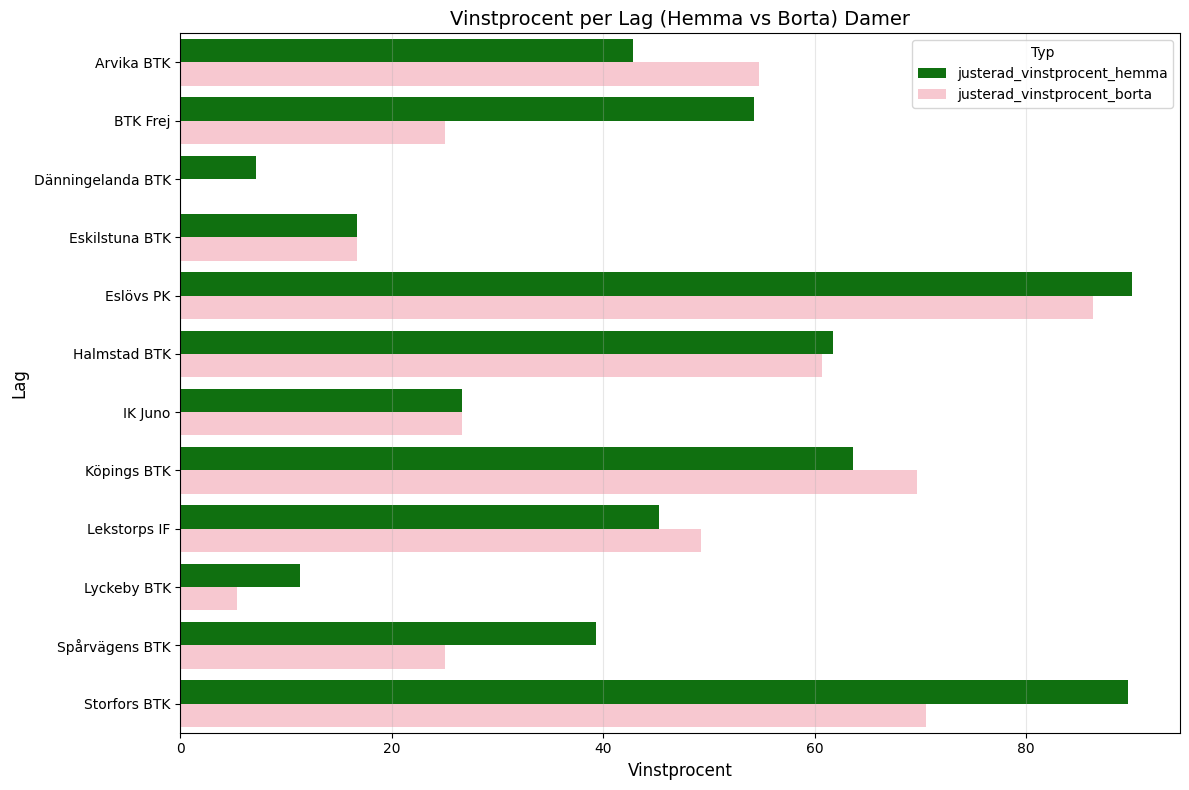

T-statistik för vinstprocent hemma vs borta: 0.39689812397982666
P-värde för vinstprocent hemma vs borta: 0.6923434528596428


In [8]:
# Ange sökvägen till filen
file_path = '/Users/wilmaberglund/pingisligandamer.csv'

# Läs in CSV-filen
df = pd.read_csv(file_path)

# Beräkna "justerad" hemmavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_hemmavinst'] = df['Hemmavinst'] + 0.5 * df['Oavgjort Hemma']

# Beräkna "justerad" bortavinst genom att räkna oavgjorda matcher som en halv vinst
df['justerad_bortavinst'] = df['Bortavinst'] + 0.5 * df['Oavgjort Borta']

# Beräkna totalt antal matcher spelade hemma (vinst, oavgjort och förlust)
df['total_matcher_hemma'] = df['Hemmavinst'] + df['Oavgjort Hemma'] + df['Hemmaförlust']

# Beräkna totalt antal matcher spelade borta (vinst, oavgjort och förlust)
df['total_matcher_borta'] = df['Bortavinst'] + df['Oavgjort Borta'] + df['Bortaförlust']

# Beräkna justerad vinstprocent hemma genom att dividera justerade hemmavinster med totala hemmamatcher och multiplicera med 100
df['justerad_vinstprocent_hemma'] = df['justerad_hemmavinst'] / df['total_matcher_hemma'] * 100

# Beräkna justerad vinstprocent borta genom att dividera justerade bortavinster med totala bortamatcher och multiplicera med 100
df['justerad_vinstprocent_borta'] = df['justerad_bortavinst'] / df['total_matcher_borta'] * 100

# Beräkna genomsnittlig vinstprocent hemma och borta per lag
vinstprocent_per_lag = df.groupby('Lag')[['justerad_vinstprocent_hemma', 'justerad_vinstprocent_borta']].mean()

# Konvertera till långformat för seaborn
vinstprocent_per_lag = vinstprocent_per_lag.reset_index().melt(id_vars='Lag', 
                                                              var_name='Typ', 
                                                              value_name='Vinstprocent')

# Plotta barplot med seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Vinstprocent',
    y='Lag',
    hue='Typ',
    data=vinstprocent_per_lag,
    palette=['green', 'pink'],
    orient='h'
)

# Anpassa plottens utseende
plt.title('Vinstprocent per Lag (Hemma vs Borta) Damer', fontsize=14)
plt.xlabel('Vinstprocent', fontsize=12)
plt.ylabel('Lag', fontsize=12)
plt.legend(title='Typ', loc='upper right')
plt.tight_layout()
plt.grid(axis='x', alpha=0.3)
plt.show()

# Filtrera data för vinstprocent hemma och borta
vinstprocent_hemma = df['justerad_vinstprocent_hemma']
vinstprocent_borta = df['justerad_vinstprocent_borta']

# Utför t-test för att jämföra vinstprocent hemma och borta
t_stat_hemma_borta, p_value_hemma_borta = ttest_ind(vinstprocent_hemma, vinstprocent_borta, equal_var=False)

# Visa resultaten
print(f"T-statistik för vinstprocent hemma vs borta: {t_stat_hemma_borta}")
print(f"P-värde för vinstprocent hemma vs borta: {p_value_hemma_borta}")



Resultaten visar att det inte finns någon signifikant skillnad mellan damernas hemmavinstprocent och bortavinstprocent, med ett p-värde på 0.6611. Detta tyder på att hemmaplan inte verkar ge någon tydlig fördel för damernas lag.

# Diskussion
Resultaten visar att publikens närvaro är en avgörande faktor för att stärka hemmaplansfördelen för herrarnas matcher. Den statistiskt signifikanta skillnaden i vinstprocent mellan säsongen utan publik och de säsonger med publik indikerar att publikens stöd har en betydande inverkan på hemmalagens prestationer. Publikens närvaro kan inte bara ge hemmalaget ett psykologiskt övertag genom motivation och stöd utan även fungera som en taktisk komponent som påverkar spelets dynamik. Samtidigt kan publikens närvaro skapa en psykologisk press och distraktion för bortalagen, vilket ytterligare förstärker hemmaplansfördelen.

Den uteblivna signifikansen i damernas hemmaplansfördel, i jämförelse med herrarnas, understryker publikens roll som en central variabel. Damernas matcher tenderar att spelas inför tomma eller nästintill tomma läktare, vilket gör att den psykologiska och taktiska fördelen som publikstöd kan ge inte är lika framträdande. Detta resultat belyser en strukturell ojämlikhet inom idrotten där förutsättningarna för herrar och damer skiljer sig åt, inte bara på planen utan även i den omgivande miljön. Skillnaden i publiknärvaro mellan herr- och dammatcher väcker frågan om hur jämställdheten inom sporten kan förbättras för att skapa mer rättvisa förutsättningar för båda könen.

Bollbytet 2016 hade en märkbar effekt under det första året, med en kraftig ökning av hemmaplansfördelen. Detta tyder på att hemmalagen kunde dra nytta av att anpassa sig snabbare till den nya plastbollens egenskaper i sin välbekanta träningsmiljö. Faktorer som skillnader i bord, golv och övriga spelmiljöer kan ha förstärkt denna fördel. Efter det första året avtog dock denna effekt, och skillnaderna i hemmaplansfördel före och efter bollbytet visade sig inte vara statistiskt signifikanta. Detta indikerar att lagen över tid lyckades jämna ut fördelarna genom anpassning och träning.

En intressant upptäckt var sponsorns roll i hemmaplansfördelen, särskilt efter bollbytet. Lag som hade andra sponsorer än Stiga visade sig prestera bättre på hemmaplan, vilket kan kopplas till att de tränar på bord som skiljer sig från de som används i matcherna. Eftersom alla lag spelar med Stiga-bollen kan dess beteende på olika bord skapa små men viktiga skillnader i spelet. Denna effekt verkar ha blivit mer påtaglig efter bollbytet, då den nya bollen möjligen var mer känslig för skillnader i material och design hos borden. Detta resultat lyfter fram betydelsen av utrustningens kompatibilitet i elitidrott och hur små tekniska faktorer kan påverka resultat.

En brist i min analys var den begränsade tillgången till data, då jag endast hade tillgång till information från och med säsongen 2010. Dessutom består Pingisligan av endast åtta lag, och det är nästan alltid samma lag som deltar varje säsong, vilket begränsar variationen och möjligheten att dra generaliserbara slutsatser. En annan brist var att jag saknade information om antalet åskådare vid matcherna, vilket hade kunnat ge en djupare förståelse för publikens påverkan på hemmaplansfördelen.

En ytterligare svaghet i min analys är att jag inte undersökte på spelarnivå, vilket kunde ha gett insikter om vilka spelare som presterar bäst i olika miljöer och under olika förutsättningar. Jag tog heller inte hänsyn till faktorer som skillnader i spelschema, resesträckor eller eventuella förändringar i lagens trupper mellan säsonger. Slutligen hade det varit värdefullt att inkludera data från fler ligor eller nivåer för att kunna jämföra och stärka analysens validitet. 


# Slutsats 

Hemmaplansfördel är ett statistiskt signifikant fenomen i Pingisligan herrar. Den största förändringen i fördelen, före och efter bytet till den nya plastbollen, berodde på vilken sponsor klubben hade. Majoriteten av lagen har Stiga som sponsor, men de lag som använde en annan sponsor fick en betydligt större fördel efter bollbytet jämfört med tidigare. Detta tyder på att den nya plastbollen är mer känslig för olika tillverkare på bord än den äldre celluloidbollen. Publikstödet spelar också en avgörande roll för hemmaplansfördelen. Under säsongen utan publik visade sig hemmaplansfördelen vara obetydlig, och skillnaden mellan denna säsong och övriga säsonger var statistiskt signifikant. Teorin stärks ytterligare av Pingisligan damer, där publikstödet generellt är mycket begränsat. Följaktligen finns det ingen signifikant hemmaplansfördel i damernas matcher.


Slutligen väcker resultaten flera frågor för framtida forskning. Det vore intressant att utforska hur publikstöd och utrustning påverkar idrottsprestationer i internationella ligor, såsom tyska Bundesliga, där fler sponsorer och varierande bollar används samt ett ännu större publikintresse. Detta skulle ge en bredare förståelse för hur externa faktorer samverkar för att forma konkurrensfördelar. Vidare skulle en djupare analys av jämställdhet inom sporten kunna belysa varför dammatcher lockar färre åskådare och vilka åtgärder som kan vidtas för att öka intresset och skapa mer balanserade förutsättningar mellan herr- och dammatcher. Resultaten från denna studie utgör en grund för att bättre förstå de dynamiska faktorer som påverkar idrottsprestationer och belyser områden som kräver ytterligare uppmärksamhet och analys

# Kod och Reproducerbarhet
All kod som använts för analysen och visualiseringen återfinns i den publicerade filen projektkod.ipynb. Den innehåller fullständiga steg för databehandling, beräkningar och statistiska tester för att säkerställa reproducerbarhet.

# Referenser
- Svenska bordtennisförbundet, https://sbtf.se